# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset 

In [2]:
data = pd.read_csv('homeprices.csv')

In [3]:
data.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


# Creating scatter plot using matplotlib

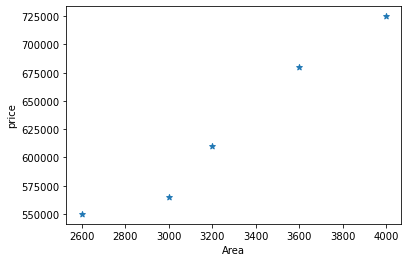

In [4]:
plt.scatter(x=data.area,y=data.price,marker='*')
plt.xlabel('Area')
plt.ylabel('price')
plt.show()

Visually it's observed that as the Area increases , price also increasing. So it's a Linear regression problem.


Let's try to build Simple Linear Regression Model to predict the price for the given Area

# Simple Linear Regression Model using Sklearn Library

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
new_df = data.drop('price', axis = 'columns')

# Creating LinearRegression Model Object

In [7]:
reg = LinearRegression()

Training the Algorithm

In [8]:
reg.fit(new_df.values, data.price.values)

LinearRegression()

Predict price of a home with area = 3300 sqr ft

In [9]:
reg.predict([[3300]])

array([628715.75342466])

Predict price of a home with area = 5000 sqr ft

In [10]:
reg.predict([[5000]])

array([859554.79452055])

Capture the coefficient from regression

In [11]:
reg.coef_

array([135.78767123])

Capture the intercept from regression

In [12]:
reg.intercept_

180616.43835616432

In [13]:
# y = mx + c
# m is a coef
# b is an intercept
# Let’s calculate the above formula for :
# area = 5000
# m = 135.78767123
# c = 180616.43835616432
# y = house_price

In [14]:
house_price = 135.78767123 * 5000 + 180616.43835616432

In [15]:
house_price

859554.7945061643

In [16]:
reg.predict([[5000]])

array([859554.79452055])

In [17]:
#it's observed that our regression model predict the value with 100% accuracy

Drawing a best fitted line

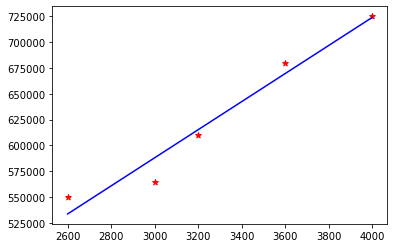

In [18]:
plt.scatter(data.area.values, data.price.values, color = 'red', marker ='*')
plt.plot(data.area.values, reg.predict(data[['area']].values), color ='blue')
plt.show()

# By using above model we can predict the group of home prices as well

Let's create dictionary with area as key and list consist values for the given key. then convert that dictionary into dataframe and will start predict the price for each area values

In [19]:
dic = {'Area' : [1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100]}

In [20]:
df = pd.DataFrame(dic)

In [21]:
df

,Area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [35]:
import warnings
warnings.filterwarnings('ignore')
p = reg.predict(df[['Area']])

In [27]:
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [31]:
np.round(p,2)

array([ 316404.11,  384297.95,  492928.08,  661304.79,  740061.64,
        799808.22,  926090.75,  650441.78,  825607.88,  492928.08,
       1402705.48, 1348390.41, 1144708.9 ])

In [32]:
df['Prices'] = np.round(p,2)

In [33]:
df

,Area,Prices
0,1000,316404.11
1,1500,384297.95
2,2300,492928.08
3,3540,661304.79
4,4120,740061.64
5,4560,799808.22
6,5490,926090.75
7,3460,650441.78
8,4750,825607.88
9,2300,492928.08


# Exporting df into csv

In [34]:
df.to_csv('output.csv')